# E-tivity 2

Student name: Sorin Slavescu

Student ID: 21185131

In this notebook I'm going to do the following:

- Encode all categorical attributes as numerical
- Fill in missing values depending on the type of the column and the importance of that feature in the ML process
- Apply a scalar for "duration" field - Will replace the duration with an int signifying the type of the phone call: long, average, short. The boundaries for these ranges will be defined after calculating the median and the average for that column Similarly for Age and the combination of poutcome and pdays
- Outliers will be addressed by shifting them to a positive range or bringing the values into a finite range i.ee. [0,1]
- Will create a new feature by combining the date and month columns and naming it call_time.


## A. Import Python Modules and Dataset

In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Check for missing values.

In [202]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Before we start transforming the dataset let's make a copy of it.

In [203]:
df_orig = df.copy()

## B. Process and Encode the Categorical Features

### Encode Ordinal Categorical Attributes 

In [204]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [205]:
for column in df.columns:
    if df_orig[column].dtype == object :
        print(f'{column} has unique vals: {df_orig[column].unique()}')
    

job has unique vals: ['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan]
marital has unique vals: ['single' 'divorced' 'married']
education has unique vals: ['tertiary' 'secondary' nan 'primary']
default has unique vals: ['no' 'yes']
housing has unique vals: ['yes' 'no']
loan has unique vals: ['no' 'yes']
contact has unique vals: ['cellular' 'telephone' nan]
month has unique vals: ['apr' 'dec' 'feb' 'jan' 'mar' 'may' 'nov' 'oct' 'aug' 'jul' 'jun' 'sep']
poutcome has unique vals: ['failure' 'other' 'success' nan]
subscribed has unique vals: ['no' 'yes']


In [206]:
# Convert categorical Education into numerical using a mapper. Set empty values to 0, primary education

scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2,
    np.nan: 0
}

df['education'] = df['education'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,0,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,0,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [207]:
scale_mapper = {
    "telephone": 0,
    "cellular": 1,
    np.nan: -1
}

df['contact'] = df['contact'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,0,no,2785,no,no,1,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1,no,127,no,no,1,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0,no,1154,no,no,0,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,0,no,4343,yes,no,-1,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1,no,6403,no,no,1,22,sep,208,2,-1,0,NaN,yes


### One-Hot Encode All Other Categorical Attributes

In [208]:
#Encode Job
dummies = pd.get_dummies(df_orig.job)
merged = pd.concat([df, dummies], axis='columns')
df = merged.drop(columns='job')
df

,age,marital,education,default,balance,housing,loan,contact,day,month,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,32.0,single,2,no,392,yes,no,1,1,apr,...,0,0,0,0,0,0,0,0,1,0
1,39.0,divorced,1,no,688,yes,yes,1,1,apr,...,0,0,0,0,0,0,0,0,1,0
2,59.0,married,1,no,1035,yes,yes,1,1,apr,...,0,0,0,0,1,0,0,0,0,0
3,47.0,married,1,no,398,yes,yes,1,1,apr,...,1,0,0,0,0,0,0,0,0,0
4,54.0,married,1,no,1004,yes,no,1,1,apr,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,single,0,no,2785,no,no,1,16,sep,...,0,0,0,0,0,0,0,1,0,0
1996,28.0,single,1,no,127,no,no,1,16,sep,...,0,0,0,0,0,0,0,0,0,0
1997,81.0,married,0,no,1154,no,no,0,17,sep,...,0,0,0,0,1,0,0,0,0,0
1998,46.0,married,0,no,4343,yes,no,-1,20,sep,...,0,0,0,0,0,0,1,0,0,0


In [209]:
# first one-hot encode the categorical columns with 2 or 3 values, reduces the number of additional columns. 
# The other categorical columns are better encoded usingmappers as education above.
#cat_cols = list(df.select_dtypes(include=['category','object']))
cat_cols = ['loan', 'default', 'poutcome', 'housing', 'marital', 'subscribed']
df = pd.get_dummies(df, columns = cat_cols, drop_first=True)

df.tail()

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,technician,unemployed,loan_yes,default_yes,poutcome_other,poutcome_success,housing_yes,marital_married,marital_single,subscribed_yes
1995,20.0,0,2785,1,16,sep,327,2,-1,0,...,0,0,0,0,0,0,0,0,1,1
1996,28.0,1,127,1,16,sep,1334,2,-1,0,...,0,0,0,0,0,0,0,0,1,1
1997,81.0,0,1154,0,17,sep,231,1,-1,0,...,0,0,0,0,0,0,0,1,0,1
1998,46.0,0,4343,-1,20,sep,185,1,-1,0,...,0,0,0,0,0,0,1,1,0,1
1999,40.0,1,6403,1,22,sep,208,2,-1,0,...,0,0,0,0,0,0,0,1,0,1


In [210]:
#Encode Month using sin and cos
from calendar import month_abbr
import math

mo_low = [m.lower() for m in month_abbr]

df['month'] = df['month'].str.lower().map(lambda m: mo_low.index(m)).astype('int64')
df['month_norm'] = 2 * math.pi * df['month'] / 12
df['cos_month'] = np.cos(df['month_norm'])
df["sin_month"] = np.sin(df["month_norm"])
df = df.drop(columns=['month_norm', 'month'])
df.tail()

,age,education,balance,contact,day,duration,campaign,pdays,previous,admin.,...,loan_yes,default_yes,poutcome_other,poutcome_success,housing_yes,marital_married,marital_single,subscribed_yes,cos_month,sin_month
1995,20.0,0,2785,1,16,327,2,-1,0,0,...,0,0,0,0,0,0,1,1,-1.836970e-16,-1.0
1996,28.0,1,127,1,16,1334,2,-1,0,1,...,0,0,0,0,0,0,1,1,-1.836970e-16,-1.0
1997,81.0,0,1154,0,17,231,1,-1,0,0,...,0,0,0,0,0,1,0,1,-1.836970e-16,-1.0
1998,46.0,0,4343,-1,20,185,1,-1,0,0,...,0,0,0,0,1,1,0,1,-1.836970e-16,-1.0
1999,40.0,1,6403,1,22,208,2,-1,0,0,...,0,0,0,0,0,1,0,1,-1.836970e-16,-1.0


In [211]:
#let's see how many columns have empty rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1988 non-null   float64
 1   education         2000 non-null   int64  
 2   balance           2000 non-null   int64  
 3   contact           2000 non-null   int64  
 4   day               2000 non-null   int64  
 5   duration          2000 non-null   int64  
 6   campaign          2000 non-null   int64  
 7   pdays             2000 non-null   int64  
 8   previous          2000 non-null   int64  
 9   admin.            2000 non-null   uint8  
 10  blue-collar       2000 non-null   uint8  
 11  entrepreneur      2000 non-null   uint8  
 12  housemaid         2000 non-null   uint8  
 13  management        2000 non-null   uint8  
 14  retired           2000 non-null   uint8  
 15  self-employed     2000 non-null   uint8  
 16  services          2000 non-null   uint8  


## C. Treatment of Missing Values in Numerical Columns

### Check for Missing Values

It is often useful to impute missing values as many ML algorithms do not work with missing data and even if they do, imputing these values often helps to build a more accurate predictive model.

In [212]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                 12
education            0
balance              0
contact              0
day                  0
duration             0
campaign             0
pdays                0
previous             0
admin.               0
blue-collar          0
entrepreneur         0
housemaid            0
management           0
retired              0
self-employed        0
services             0
student              0
technician           0
unemployed           0
loan_yes             0
default_yes          0
poutcome_other       0
poutcome_success     0
housing_yes          0
marital_married      0
marital_single       0
subscribed_yes       0
cos_month            0
sin_month            0
dtype: int64

### Impute Missing Values
I'm going to try and find some ways of filling in the missing values for age

There might be correlations between age, balance and loan_yes that may indicate some value for age

First we'll append an age brackets column to see if it helps


In [213]:
df['age_grp'] = df['age'].map(lambda x:0 if np.isnan(x) else int(x/10)*10)
df.tail()

,age,education,balance,contact,day,duration,campaign,pdays,previous,admin.,...,default_yes,poutcome_other,poutcome_success,housing_yes,marital_married,marital_single,subscribed_yes,cos_month,sin_month,age_grp
1995,20.0,0,2785,1,16,327,2,-1,0,0,...,0,0,0,0,0,1,1,-1.836970e-16,-1.0,20
1996,28.0,1,127,1,16,1334,2,-1,0,1,...,0,0,0,0,0,1,1,-1.836970e-16,-1.0,20
1997,81.0,0,1154,0,17,231,1,-1,0,0,...,0,0,0,0,1,0,1,-1.836970e-16,-1.0,80
1998,46.0,0,4343,-1,20,185,1,-1,0,0,...,0,0,0,1,1,0,1,-1.836970e-16,-1.0,40
1999,40.0,1,6403,1,22,208,2,-1,0,0,...,0,0,0,0,1,0,1,-1.836970e-16,-1.0,40


In [214]:
# Fill in the age with the median
df['age'].fillna(df_orig['age'].mean(), inplace=True)
df.isna().sum()

age                 0
education           0
balance             0
contact             0
day                 0
duration            0
campaign            0
pdays               0
previous            0
admin.              0
blue-collar         0
entrepreneur        0
housemaid           0
management          0
retired             0
self-employed       0
services            0
student             0
technician          0
unemployed          0
loan_yes            0
default_yes         0
poutcome_other      0
poutcome_success    0
housing_yes         0
marital_married     0
marital_single      0
subscribed_yes      0
cos_month           0
sin_month           0
age_grp             0
dtype: int64

## D. Rescaling Features

We will rescale the numerical `education` field to be within the `[0 1]` range All values are 0,1 or 2 so let's just devide by 2

In [215]:
df['education'] = df['education']/2

In [216]:
df['duration'].value_counts()

200     12
90      11
219     11
187     10
263     10
        ..
1363     1
343      1
1226     1
373      1
1334     1
Name: duration, Length: 655, dtype: int64

Let's rescale the balance and duration

In [217]:
robust_scaler = RobustScaler()
df[['balance','duration']] = robust_scaler.fit_transform(df[['balance','duration']])

## E. Treatment of Outliers

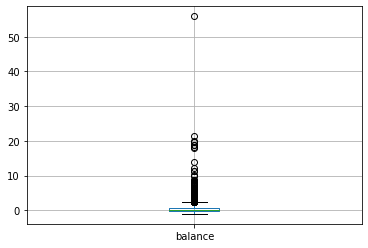

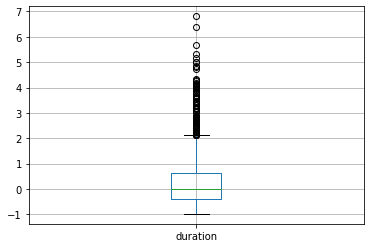

In [218]:
df.boxplot(column=['balance'])
plt.show()
df.boxplot(column=['duration'])

plt.show()

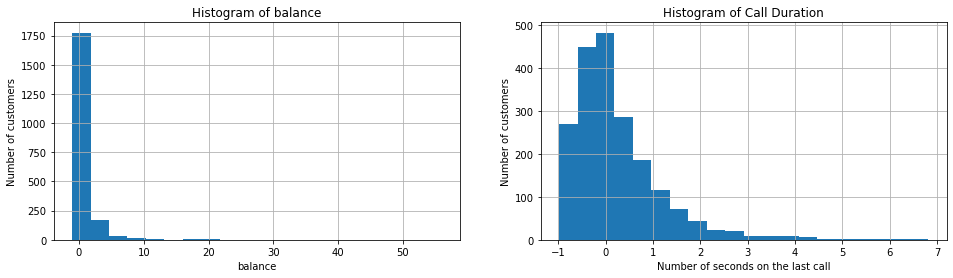

In [219]:
# Create figure with two subplots ansd do a histogram for the scaled balance and pdays
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of customers')
df['balance'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Call Duration")
ax3.set_xlabel('Number of seconds on the last call')
ax3.set_ylabel('Number of customers')
df['duration'].hist(bins=20)

plt.show()

Both histograms are skewed to the left, which is not ideal.

Finally, before treating the outliers, let's find the minimum values in these columns.

In [220]:
df[['balance', 'duration']].min()

balance    -1.060984
duration   -0.982833
dtype: float64

We have negative values in the balance column after rescaling and we need to add a constant to all values in order to shift them to a positive range before applying a log transformation. 

Here we are have chosen to shift the values to the interval $[1, +\infty]$ before applying a log transformation.

In [221]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.06) # added 1 to the minimum value and change the sign
df['duration'] = np.log(df['duration']+2)

Let's plot again.

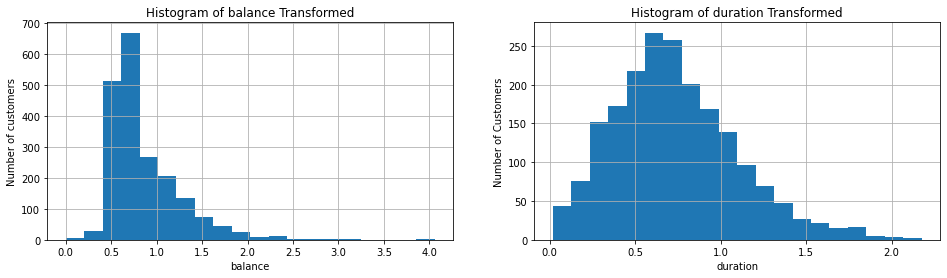

In [222]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance Transformed")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of customers')
df['balance'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of duration Transformed")
ax3.set_xlabel('duration')
ax3.set_ylabel('Number of Customers')
df['duration'].hist(bins=20)

plt.show()

Fixed the skewness a bit towards a more normal distribution, especially in the duration field

#### `pdays`

Let's examine the distribution of values in `pdays`. 

In [223]:
df['pdays'].value_counts()

-1      454
 182     68
 181     62
 92      51
 91      41
       ... 
 109      1
 43       1
 82       1
 277      1
 409      1
Name: pdays, Length: 363, dtype: int64

I think we need to replace -1 with 999 

In [224]:
df['pdays'] = df['pdays'].replace(-1, 999)

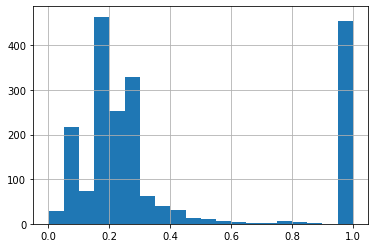

In [225]:
df['pdays'] = df['pdays']/999
df['pdays'].hist(bins=20)
plt.show()

## F. Creation of Derived Features

Let's combine `day` and `month` and convert it into a numeric and name it call_time_int We will use the original data frame for the initial values. This new value will be retaining the progression of time. The assumption made is that the year is the same, I've put it to 2021

In [226]:
df_timestamp = df_orig.copy()

In [227]:
df_timestamp['call_time'] = df_timestamp['day'].astype(str) + df_timestamp['month'].astype(str)+'2021'
df['call_time_int'] = pd.to_datetime(df_timestamp['call_time'], format='%d%b%Y').astype('int64')
df.tail()

/tmp/ipykernel_3171/197129122.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['call_time_int'] = pd.to_datetime(df_timestamp['call_time'], format='%d%b%Y').astype('int64')


,age,education,balance,contact,day,duration,campaign,pdays,previous,admin.,...,poutcome_other,poutcome_success,housing_yes,marital_married,marital_single,subscribed_yes,cos_month,sin_month,age_grp,call_time_int
1995,20.0,0.0,1.283199,1,16,0.871527,2,1.0,0,0,...,0,0,0,0,1,1,-1.836970e-16,-1.0,20,1631750400000000000
1996,28.0,0.5,0.568812,1,16,1.903963,2,1.0,0,1,...,0,0,0,0,1,1,-1.836970e-16,-1.0,20,1631750400000000000
1997,81.0,0.0,0.907403,0,17,0.682360,1,1.0,0,0,...,0,0,0,1,0,1,-1.836970e-16,-1.0,80,1631836800000000000
1998,46.0,0.0,1.544976,-1,20,0.577240,1,1.0,0,0,...,0,0,1,1,0,1,-1.836970e-16,-1.0,40,1632096000000000000
1999,40.0,0.5,1.810817,1,22,0.631180,2,1.0,0,0,...,0,0,0,1,0,1,-1.836970e-16,-1.0,40,1632268800000000000


In [228]:
# check the duration column from the initial data set and convert it to a range of values
# first let's see if there are any empty values there
df_orig['duration'].isna().sum()

0

It's good we have no empty rows in the 'duration' column
We can now display the histogram of this so that we find the boundaries for the 3 categories: short_call, average_call, long_call

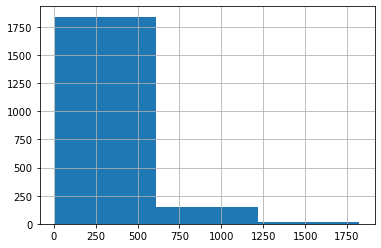

In [229]:
df_orig['duration'].hist(bins=3)
plt.show()

In [230]:
def categ(row):
    if row['duration'] > 0 and row['duration'] <= 120 :
        return 0 # short call
    elif row['duration'] > 120 and row['duration'] <= 600 :
        return 1 # average call
    elif row['duration'] > 600 :
        return 2 #long call

df['call_len'] = df_orig.apply(lambda row: categ(row), axis=1)

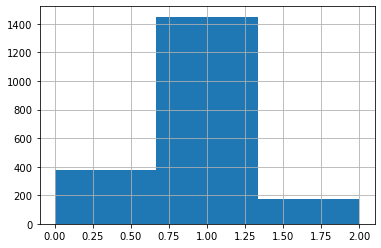

In [231]:
df['call_len'].hist(bins=3)
plt.show()

# G. Save the Prepared Dataset

Finally, let's save the prepared dataset as a CSV file.

In [232]:
df.to_csv('bank_prepared.csv')